# Chapter 11: Advanced Forecasting

## Summary
- The single-asset methodology also applies to multiple assets
- A complication occurs when we have cross-sectional and not time series scores.  In many cases, we need not multiply cross-sectional scores by volatility
- If you have information, and you forecast some factor returns, do not set other factor forecasts to zero
- Uncertainty in the IC will lead to shrinkage in the alpha


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Multiple Assets

The basic forecasting formula:

$$ \boxed{ E\{\mathbf{r}|\mathbf{g}\} = E\{\mathbf{r}\} + Cov\{\mathbf{r,g}\} \cdot Var^{-1}\{\mathbf{g}\} \cdot (\mathbf{g} - E\{\mathbf{g}\}) } $$

Also applies in the case of multiple assets and multiple signals.  We can treat both 𝐫 and 𝐠 as vectors of length N and K respectively where K/N measures the number of signals per asset

## Cross Sectional Scores (with examples)

Cross Sectional Scores (standardised with mean 0 and standard deviation 1) across N stocks at one point in time.

$$ \boxed{ z_{CS,n}(t) = \frac{g_{n}(t) - E_{CS}\{g_{n}(t)\}}{Std_{CS}\{g_{n}(t)\}} } $$

In below examples we assume mean forecast over time is 0 for each stock, and the IC for each stock is the same and the forecasts are uncorrected across stocks.

**Case 1: &nbsp; Identical Time Series Signal Volatilities**

We assume here that &nbsp; $Std_{TS}\{g_{n}\} = c_{1}$ &nbsp; where c₁ is independent of n.

It follows that

$$ \boxed{ z_{TS,n} = \frac{g_{n}}{Std_{TS}\{g_{n}\}} = \frac{g_{n}}{c_{1}} = \frac{g_{n}}{Std_{CS}\{g_{n}\}} } $$

$$ \boxed{ \alpha_{n} = \omega_{n} \cdot IC \cdot z_{CS,n} }$$

**Case 2: &nbsp; Time Series Signal Volatilities Proportional to Asset Volatilities**

Here we assume &nbsp; $Std_{TS}\{g_{n}\} = c_{2} \cdot \omega_{n}$ &nbsp; that time series standard deviations depend on asset volatilities:

If follows after using earlier results that:

$$ \boxed{ \phi_{n} =  IC \cdot \left(\frac{Std_{CS}\{g_{n}\}}{Std_{CS}\{\frac{g_{n}}{\omega_{n}}\}}\right) \cdot \left(\frac{g_{n}}{Std_{CS}\{g_{n}\}}\right) } $$

However, the second term on the RHS is just a constant, independent of n.  Calling this $c_{g}$ we obtain:


$$ \boxed{ \phi_{n} = IC \cdot c_{g} \cdot z_{CS,n} }$$

So if time series signal volatilities are proportional to asset volatilities then the refined forecast are proportional to cross-sectional scores and independent of volatility.


## Empirical Evidence

Consider for example the following six signals

| Model                         | $IC \cdot z_{cs}$ | $\omega_{n} \cdot IC \cdot z_{cs}$  | $R^{2}$ |
|-------------------------------|-------------------|-------------------------------------|---------|
| Dividend discount model (DDM) | 1.31              | 1.19                                | 0.37    |
| Estimate change               | 1.92              | 1.87                                | 0.34    |
| Estimate revision             | 3.55              | 3.32                                | 0.31    |
| Relative strength             | 1.93              | 1.93                                | 0.72    |
| Residual reversal             | 2.51              | 2.18                                | 0.77    |
| Sector momentum               | 1.91              | 2.10                                | 0.01    |

For all but sector momentum we see very strong positive linear relationship between time series signal volatilities and asset residual volatilities.  This implies need _not_ rescale thees cross-sectional scores by volatility when estimating expected exceptional return.

Forecasts have the form **volatility ⋅ IC ⋅ score**.  Sometimes this is simply proportional to **IC ⋅ cross-sectional score**


## Factor Forecasts

One standard way to apply structure to the case of multiple assets is through a factor model.  In particular arbitrage pricing theory (APT) states all return forecast assume the form

$$\boxed{ E\{\mathbf{r}\} = \mathbf{X \cdot m} }$$

where &nbsp; $\mathbf{r} = \mathbf{X \cdot b} + \mathbf{u}$ &nbsp; and &nbsp;  $\mathbf{m} = E\{\mathbf{b}\}$

Reducing the problem of forecasting hundreds, if not thousands, of asset returns to that of forecasting a handful of factor returns.



## Uncertain Information Coefficients

How to combine signals if one estimated IC has a much higher estimation error than the other.

The result derived using $R^{2}$ statistic from the (no prior) regression which should equal $IC^{2}$. &nbsp; As small, we can approximate as

$$ \boxed{ b' \approx \left( \frac{1}{1 + \left[\frac{1}{T \cdot IC^{2}}\right]} \right) \cdot b } $$

where $b'$ is the adjusted coefficient of the original estimate $b$ to account for uncertainty.  With a large number of observations $T$ or a high information coefficient we remain close to the naive estimate $b$

Below demonstrates this as a function of $IC$ and months of observation $T$


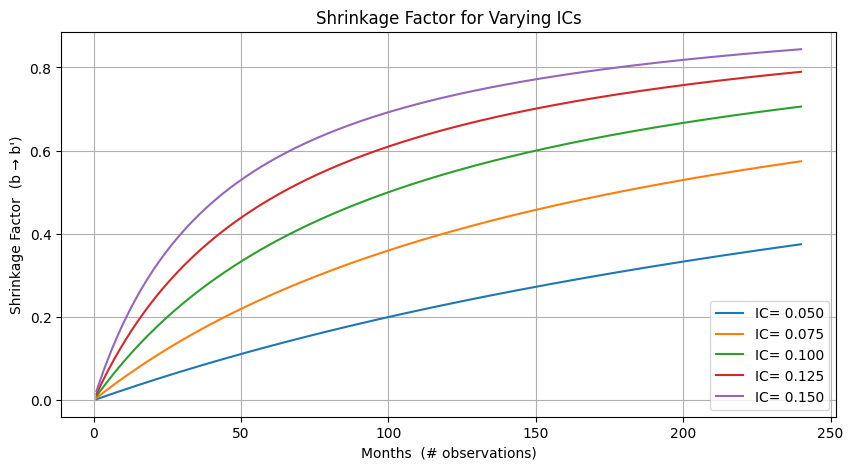

In [2]:
def shrinkage_factor(num_observations, ic):
     return 1 / (1 + (1/(num_observations * ic**2)))

months = np.array(range(1,241))
ic_levels = [0.05, 0.075, 0.10, 0.125, 0.15]

plt.subplots(figsize=(10, 5))
for ic_level in ic_levels:
    plt.plot(months, shrinkage_factor(months,  ic_level), label=f'IC= {ic_level:.3f}')

plt.grid(True)
plt.title("Shrinkage Factor for Varying ICs")
plt.xlabel("Months  (# observations)")
plt.ylabel("Shrinkage Factor  (b → b')")
plt.legend(loc='lower right')
plt.show()